### Wstęp do Uczenia Maszynowego 
##### Laboratorium 14

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Zadanie 1
---
Zbiór danych s1.csv zawiera pewne sztucznie wygenerowane dwuwymiarowe dane.

a) Zwizualizuj dane.

b) Dopasuj metodę k-średnich. Zaproponuj liczbę klastrów.

c) Dopasuj metodę klasteryzacji hierarhicznej z funkcją łączącą *single* i *complete*.

d) Określ optymalną liczbę klastrów. Zwizualizuj dokonany podział na klastry. Która metoda daje lepsze rezultaty?

In [2]:
df = pd.read_csv("s1.csv")

In [3]:
df.columns = ["X1", "X2"]
df

,X1,X2
0,665845,557965
1,597173,575538
2,618600,551446
3,635690,608046
4,588100,557588
...,...,...
4994,665426,853940
4995,691827,863963
4996,650661,861267
4997,599647,858702


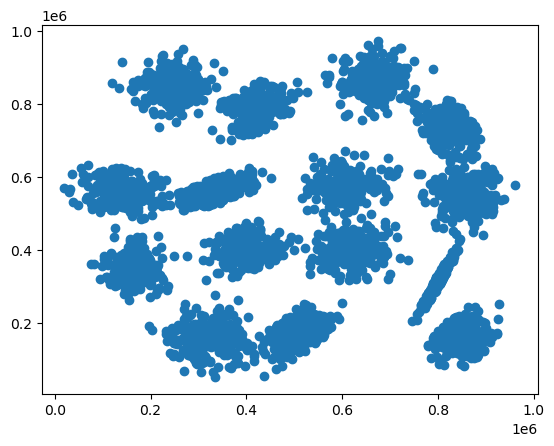

In [4]:
# a)
plt.scatter(x = df.X1, y = df.X2)

In [5]:
# b)
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }

sse = []

for k in range(8, 20):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

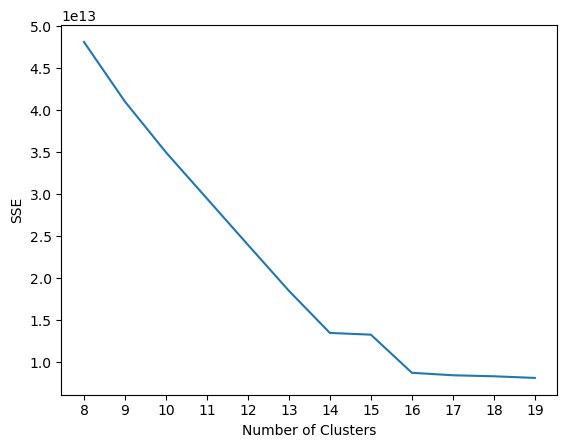

In [6]:
plt.plot(range(8, 20),sse)
plt.xticks(range(8, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

In [7]:
# Warto rozważyć 14 lub 15 klastrów.

kmeans = KMeans(n_clusters=15, n_init=10).fit(df)

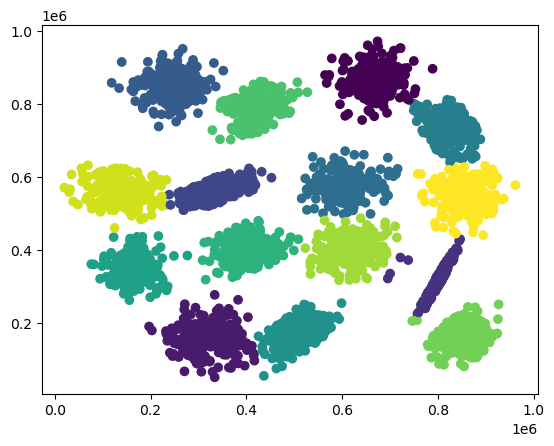

In [8]:
plt.scatter(x = df.X1, y = df.X2, c = kmeans.labels_)

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
# c) i d)
AgCl_single = AgglomerativeClustering(linkage="single", n_clusters=15).fit(df)
AgCl_complete = AgglomerativeClustering(linkage="complete", n_clusters=15).fit(df)


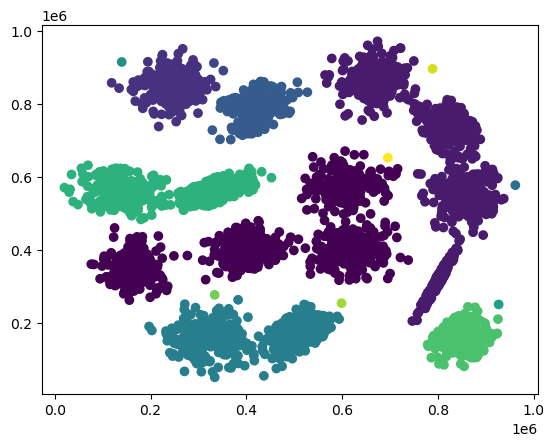

In [11]:
plt.scatter(x = df.X1, y = df.X2, c = AgCl_single.labels_)

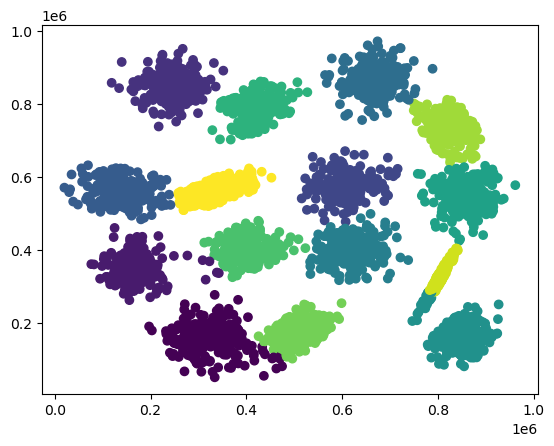

In [12]:
plt.scatter(x = df.X1, y = df.X2, c = AgCl_complete.labels_)

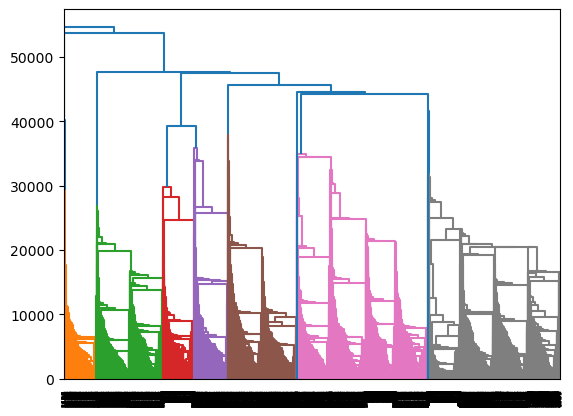

In [13]:
# pełny dendogram 
from scipy.cluster import hierarchy
Z = hierarchy.linkage(df, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)

## DBSCAN

In [14]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

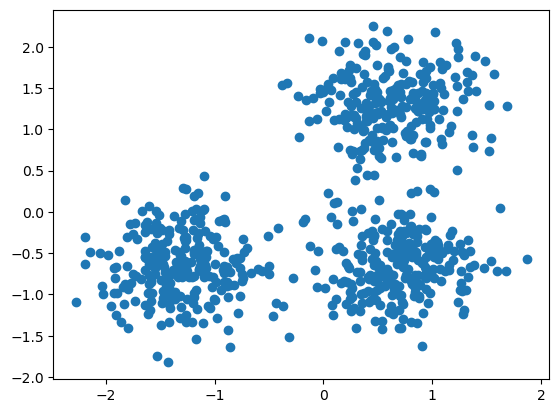

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

In [16]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


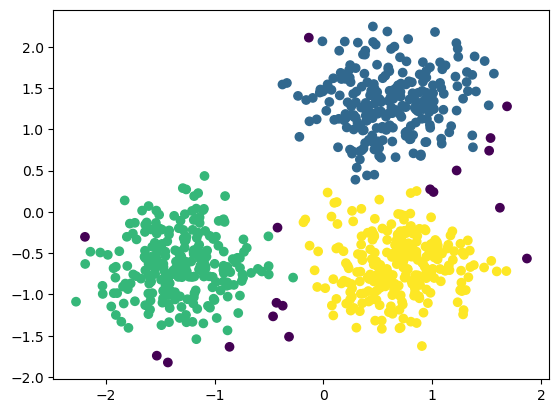

In [17]:
plt.scatter(X[:, 0], X[:, 1], c = db.labels_)

### Zadanie 2
---
Zbiór danych jain.csv zawiera dwuwymiarowe dane.

a) Zwizualizuj dane.

b) Użyj algorytmu k-średnich z liczbą klastrów równą 2. Zwizualizuj dokonany podział na klastry.
Czy metoda dobrze działa? Porównaj uzyskane wyniki z prawdziwymi wartościami klastrów.

c) Powtórz wcześniejszy podpunkt dla algorytmu DBSCAN. Która metoda daje najbardziej
zbliżony do rzeczywistego podział na klastry?


In [18]:
jain = pd.read_csv("jain.csv")

In [19]:
jain.columns = ["X1", "X2", "Y"]

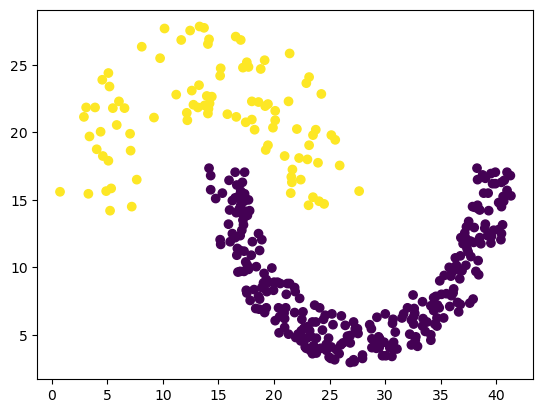

In [20]:
# a)
plt.scatter(x = jain.X1, y = jain.X2, c = jain.Y)

In [21]:
# b)
kmeans = KMeans(n_clusters=2, n_init=10).fit(jain)

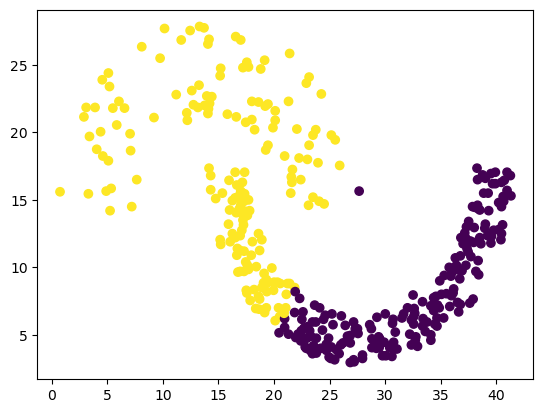

In [22]:
plt.scatter(x = jain.X1, y = jain.X2, c = kmeans.labels_)

In [23]:
# c)
# wymaga doboru parametrów, dla eps=2.5 oraz min_samples=15 dobrze rozdziela klasy
db = DBSCAN(eps=2.5, min_samples=15).fit(jain)

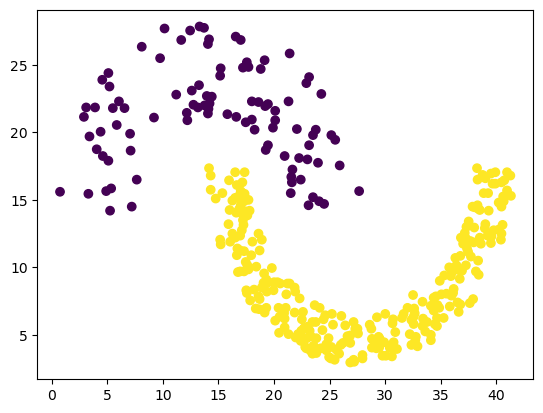

In [24]:
plt.scatter(x = jain.X1, y = jain.X2, c = db.labels_)